In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.13.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

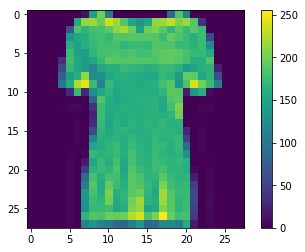

In [11]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
#preprocess the images before passing in the neural net
train_images = train_images/255.0 #scaling the values to the range of 0 to 1
test_images = test_images/255.0

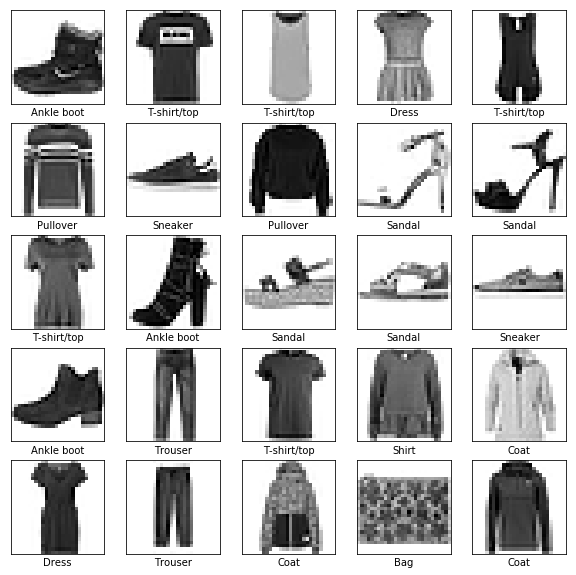

In [13]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])    
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])



Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4929 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3684 - acc: 0.8671
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3351 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3091 - acc: 0.8864
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2931 - acc: 0.8918


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.3701 - acc: 0.8686


In [27]:
predictions = model.predict(test_images)

In [28]:
np.argmax(predictions[0])

9

In [29]:
test_labels[0]

9

In [59]:
def plot_graph(i, predictions_array, true_label, image):
    predictions_array, true_label, img = predictions_array[i], true_label[i], image[i]
    predicted_label = np.argmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'green'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_values(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    predicted_label = np.argmax(predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
#     plt.xlabel(class_names)
#     plt.figure(figsize=(6,10))
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0,1])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
    
    
        

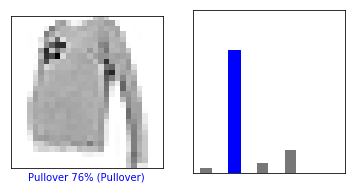

In [61]:
i = 600
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_graph(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_values(i, predictions,  test_labels)
plt.show()


/home/dynamo/sam_d007/surveillance/venv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


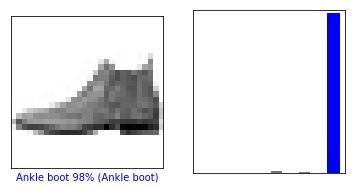

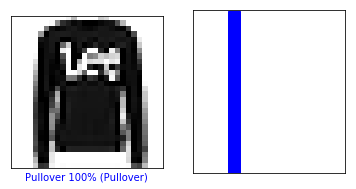

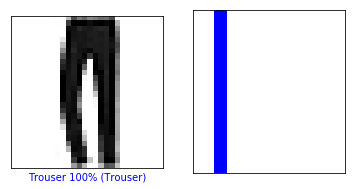

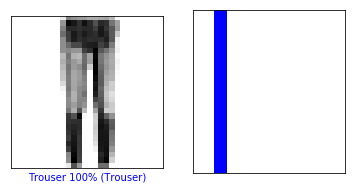

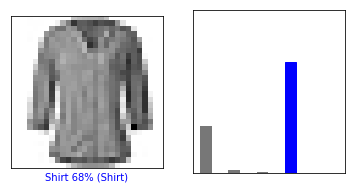

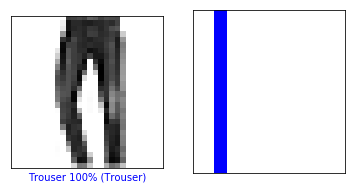

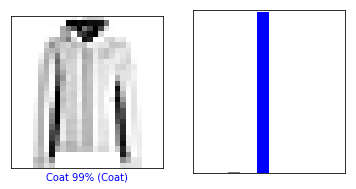

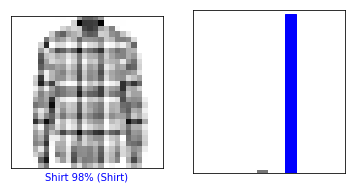

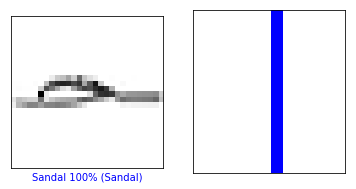

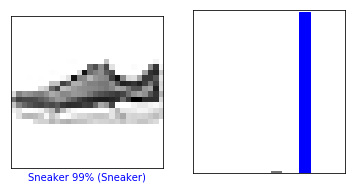

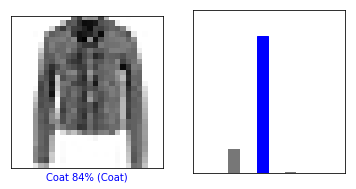

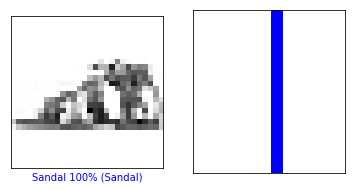

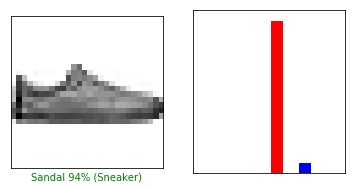

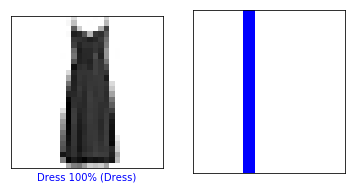

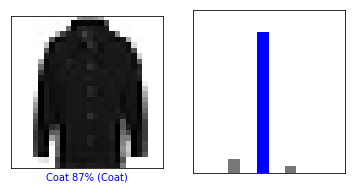

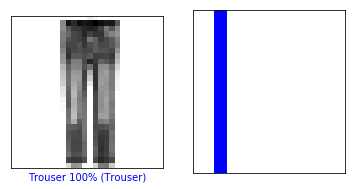

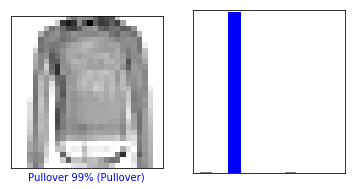

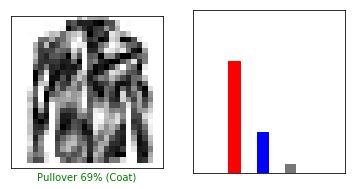

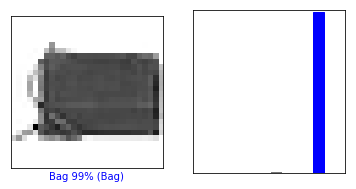

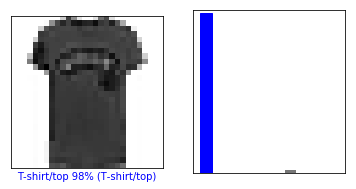

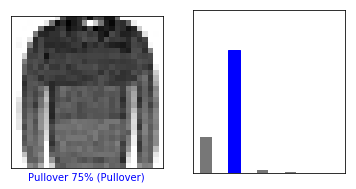

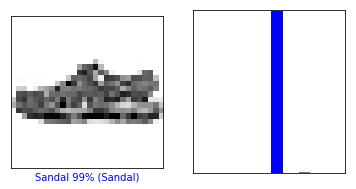

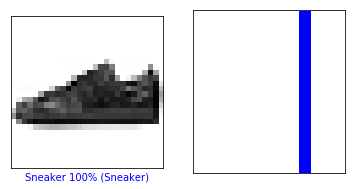

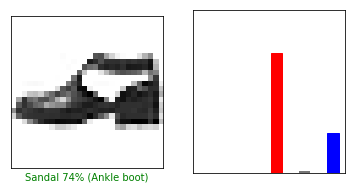

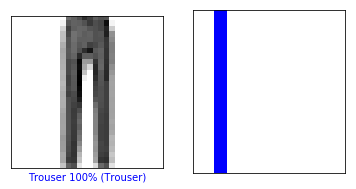

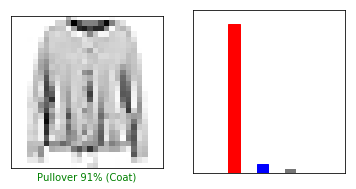

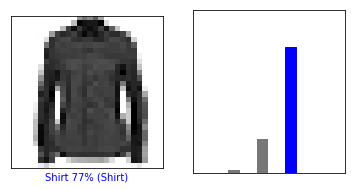

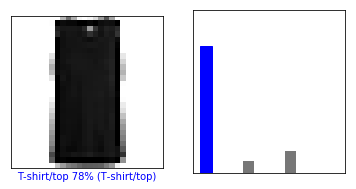

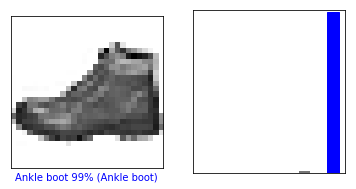

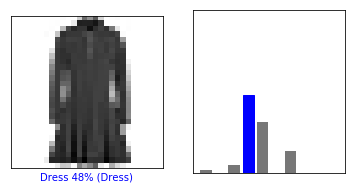

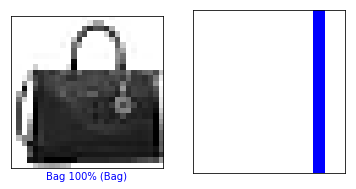

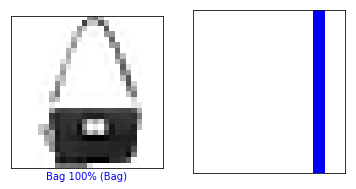

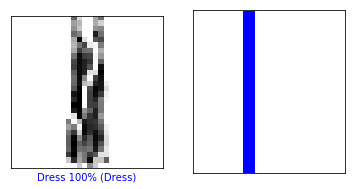

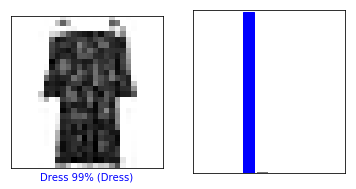

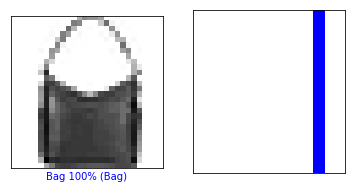

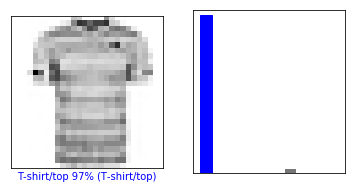

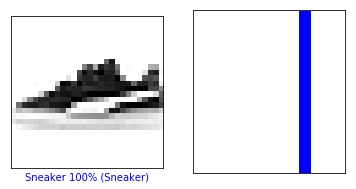

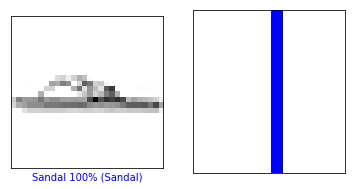

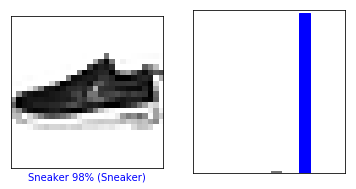

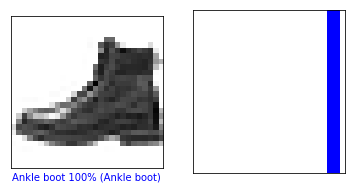

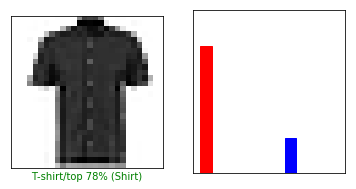

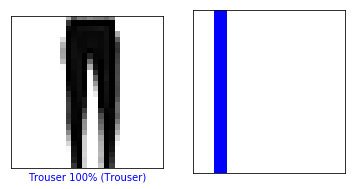

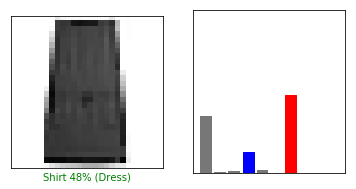

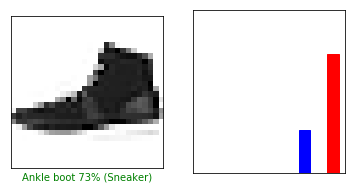

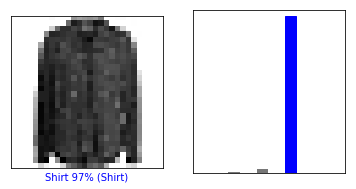

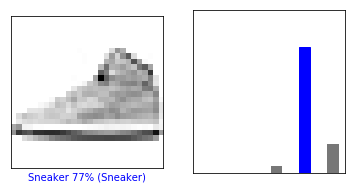

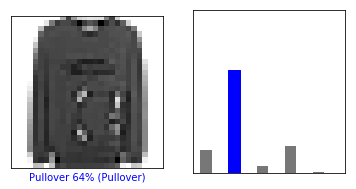

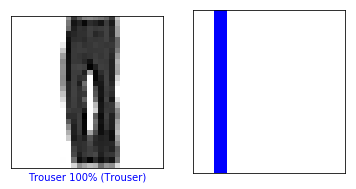

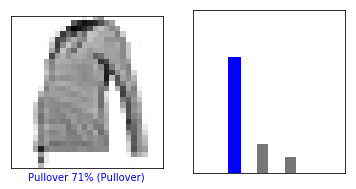

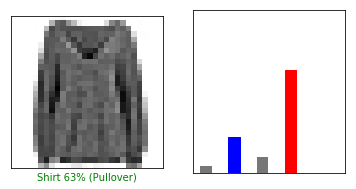

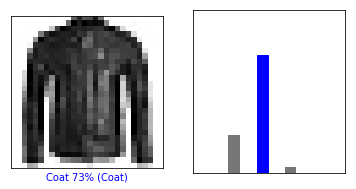

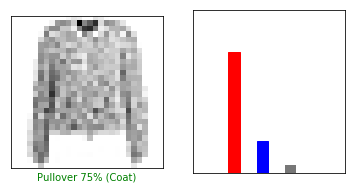

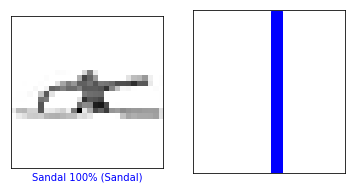

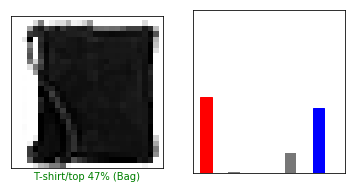

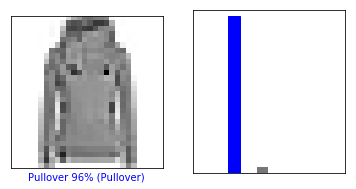

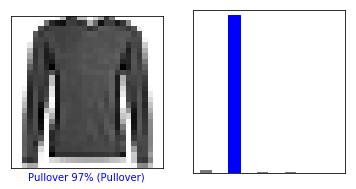

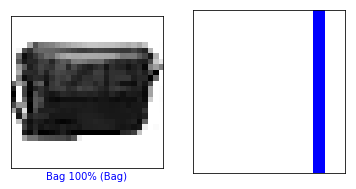

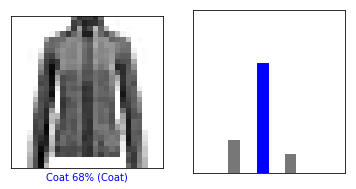

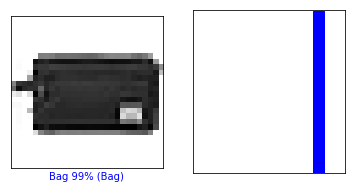

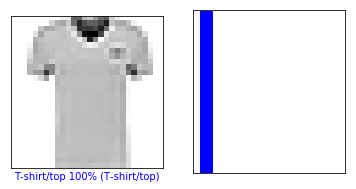

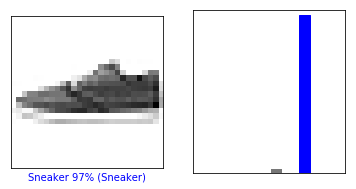

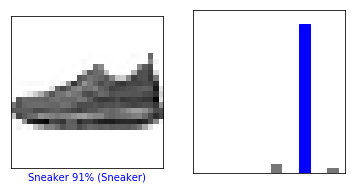

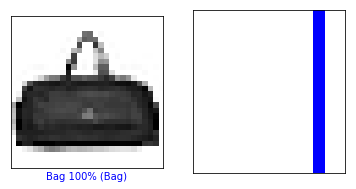

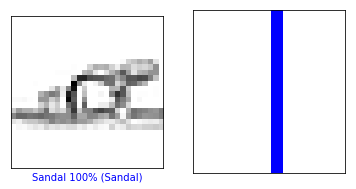

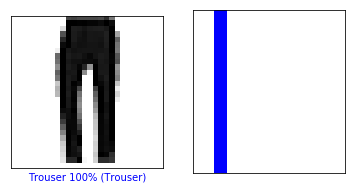

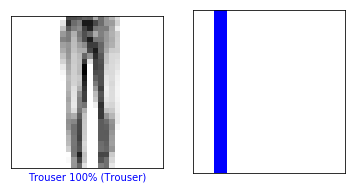

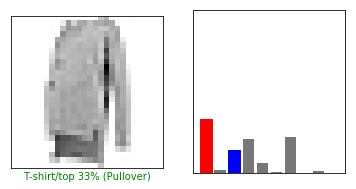

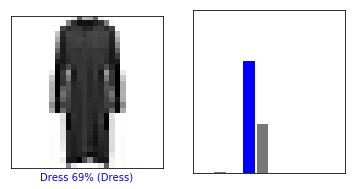

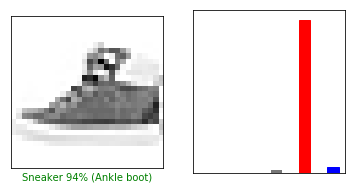

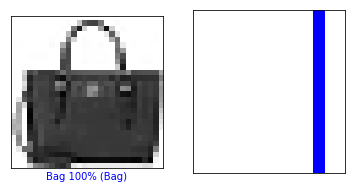

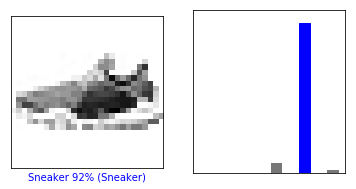

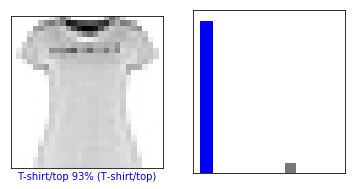

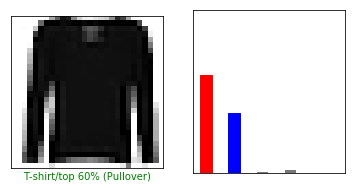

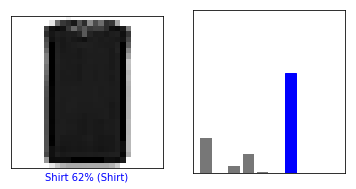

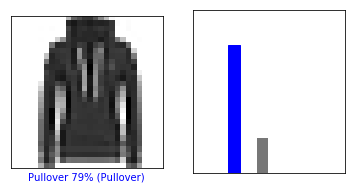

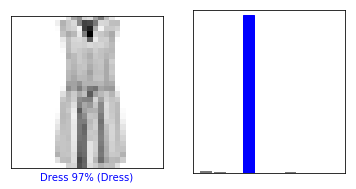

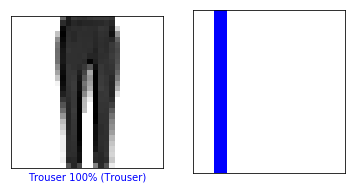

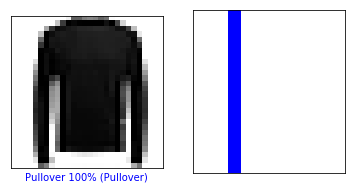

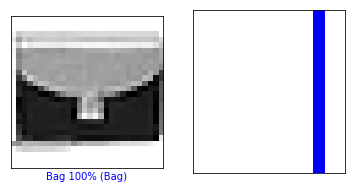

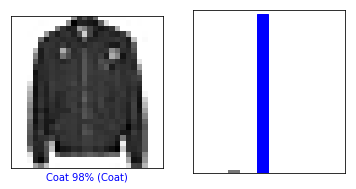

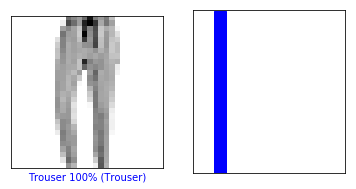

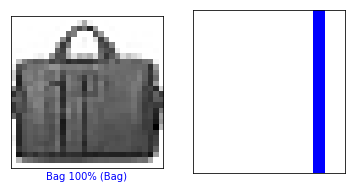

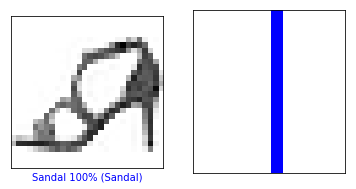

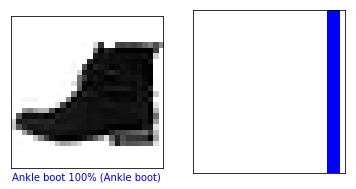

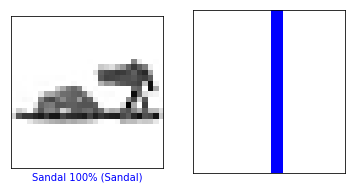

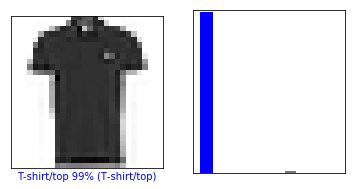

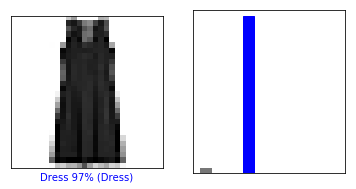

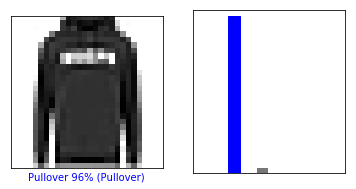

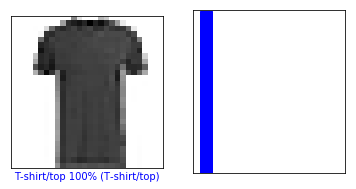

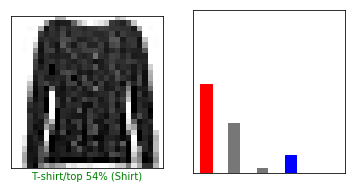

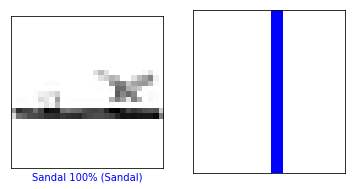

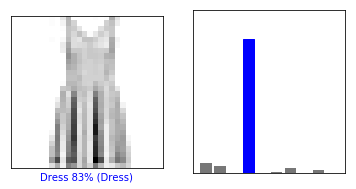

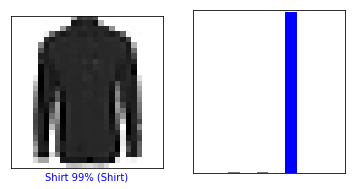

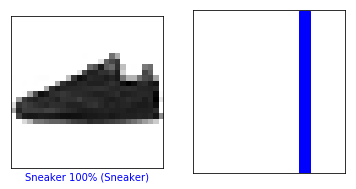

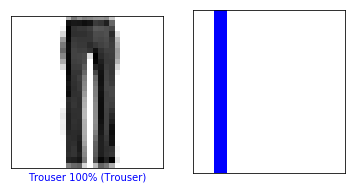

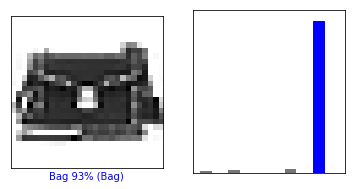

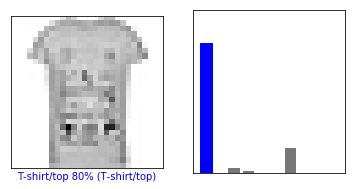

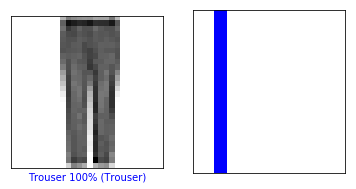

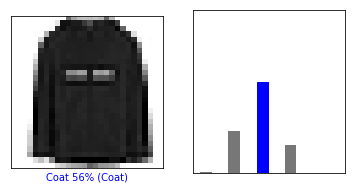

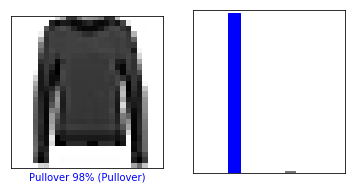

In [63]:
for i in range(100):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_graph(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_values(i, predictions,  test_labels)
plt.show()


In [83]:
img = test_images[500]
img.shape
img = np.expand_dims(img, 0)
img.shape
p = np.argmax(model.predict(img))
a = test_labels[60]
print("predicted", p)
print("actual", a)
#add the above image to a batch

predicted 2
actual 7


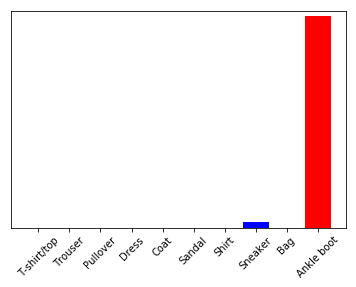

In [87]:
plot_values(800, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
